<a href="https://colab.research.google.com/github/bkkaggle/pytorch-CycleGAN-and-pix2pix/blob/master/pix2pix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install

In [ ]:
!git clone https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix

In [ ]:
import os
os.chdir('pytorch-CycleGAN-and-pix2pix/')

In [ ]:
!pip install -r requirements.txt

# Datasets

Download one of the official datasets with:

-   `bash ./datasets/download_pix2pix_dataset.sh [cityscapes, night2day, edges2handbags, edges2shoes, facades, maps]`

Or use your own dataset by creating the appropriate folders and adding in the images. Follow the instructions [here](https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix/blob/master/docs/datasets.md#pix2pix-datasets).

In [1]:
!bash ./datasets/download_pix2pix_dataset.sh facades

Specified [facades]
for details.

--2022-10-05 19:21:06--  http://efrosgans.eecs.berkeley.edu/pix2pix/datasets/facades.tar.gz
Resolving efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)... 128.32.244.190
Connecting to efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)|128.32.244.190|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30168306 (29M) [application/x-gzip]
Saving to: ‘./datasets/facades.tar.gz’

./datasets/facades. 100%[===================>]  28,77M   225KB/s    in 82s     

2022-10-05 19:22:29 (361 KB/s) - ‘./datasets/facades.tar.gz’ saved [30168306/30168306]

facades/
facades/test/
facades/test/27.jpg
facades/test/5.jpg
facades/test/72.jpg
facades/test/1.jpg
facades/test/10.jpg
facades/test/100.jpg
facades/test/101.jpg
facades/test/102.jpg
facades/test/103.jpg
facades/test/104.jpg
facades/test/105.jpg
facades/test/106.jpg
facades/test/11.jpg
facades/test/12.jpg
facades/test/13.jpg
facades/test/14.jpg
facades/test/15.jpg
facades/test/16

# Training

-   `python train.py --dataroot ./datasets/facades --name facades_pix2pix --model pix2pix --direction BtoA`

Change the `--dataroot` and `--name` to your own dataset's path and model's name. Use `--gpu_ids 0,1,..` to train on multiple GPUs and `--batch_size` to change the batch size. Add `--direction BtoA` if you want to train a model to transfrom from class B to A.

In [2]:
!python train.py --dataroot /n/pfister_lab2/Lab/scajas/DATASETS/DATASET_pix2pix/train/ --name vcg --dataset_mode vcg --model pix2pix --direction BtoA --use_wandb

----------------- Options ---------------
               batch_size: 1                             
                    beta1: 0.5                           
          checkpoints_dir: ./checkpoints                 
           continue_train: False                         
                crop_size: 256                           
                 dataroot: /home/sebasmos/Desktop/DATASETS/pix2pix/train/	[default: None]
             dataset_mode: vcg                           	[default: aligned]
                direction: BtoA                          	[default: AtoB]
              display_env: main                          
             display_freq: 400                           
               display_id: 1                             
            display_ncols: 4                             
             display_port: 8097                          
           display_server: http://localhost              
          display_winsize: 256                           
                    e

# Testing

-   `python test.py --dataroot ./datasets/facades --direction BtoA --model pix2pix --name facades_pix2pix`

Change the `--dataroot`, `--name`, and `--direction` to be consistent with your trained model's configuration and how you want to transform images.

> from https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix:
> Note that we specified --direction BtoA as Facades dataset's A to B direction is photos to labels.

> If you would like to apply a pre-trained model to a collection of input images (rather than image pairs), please use --model test option. See ./scripts/test_single.sh for how to apply a model to Facade label maps (stored in the directory facades/testB).

> See a list of currently available models at ./scripts/download_pix2pix_model.sh

In [ ]:
!ls checkpoints/

In [ ]:
!python test.py --dataroot ./datasets/facades --direction BtoA --model pix2pix --name facades_label2photo_pretrained --use_wandb

In [6]:
!pwd

/net/coxfs01/srv/export/coxfs01/pfister_lab2/share_root/Lab/scajas/pytorch-CycleGAN-and-pix2pix


# Visualize wandb results

In [3]:
#path = "/net/coxfs01/srv/export/coxfs01/pfister_lab2/share_root/Lab/scajas/pytorch-CycleGAN-and-pix2pix/experiments/small_artifacts_06_10_22/files/media/images"
#path = "/net/coxfs01/srv/export/coxfs01/pfister_lab2/share_root/Lab/scajas/pytorch-CycleGAN-and-pix2pix/test_results/vcg_19_ch_upsampled/files/media/images/"
#path = "/net/coxfs01/srv/export/coxfs01/pfister_lab2/share_root/Lab/scajas/pytorch-CycleGAN-and-pix2pix/experiments/vcg_19_ch_upsampled/files/media/images"
path = "/net/coxfs01/srv/export/coxfs01/pfister_lab2/share_root/Lab/scajas/pytorch-CycleGAN-and-pix2pix/wandb/run-20221011_000118-2eryrxjs/files/media/images"

In [4]:
import os 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from skimage import io

import os.path

%matplotlib inline

def plot_imgs(imgs, titles):
    """
    Generate visualization of list of arrays
    :param imgs: list of arrays, each numpy array is an image of size (width, height)
    :param titles: list of titles [string]
    """
    # create figure
    fig = plt.figure(figsize=(70, 70))
    # loop over images
    for i in range(len(imgs)):
        fig.add_subplot(4, 4, i + 1)
        plt.imshow(imgs[i])
        plt.title(str(titles[i]))
        plt.axis("off")
        
def return_list_of_matches(key, elements):
    """
    uses the key (identifier for each generated image) and 
    returns on a list all the elemets on the path that contain that key.
    In general should be Real A, Fake B, Real B
    """
    lista_elementos = []
    for i in elements:
        if key in i:
            lista_elementos.append(i)
    return lista_elementos

### Visualize automatically
Improve to read same image all the time

In [5]:
def return_list_of_matches(key, elements):
    lista_elementos = []
    for i in elements:
        if key in i:
            lista_elementos.append(i)
    return lista_elementos

def plot_resultsv1(path,thr):
    idx =0
    for el in os.listdir(path):
        if ".png" in el:
            matcher = el.split("_")[2]
            key = "_"+matcher+"_"
            list_of_images = return_list_of_matches(key, os.listdir(path))
            print("Aligned images: ", list_of_images)
            Real_A = io.imread(os.path.join(path, list_of_images[0]))
            Fake_B = io.imread(os.path.join(path, list_of_images[1]))
            Real_B = io.imread(os.path.join(path, list_of_images[2]))
            plot_imgs([Real_A, Fake_B, Real_B], ["Real A", "Fake B", "Real B"])
            plot_imgs([Fake_B[:,:,0], Fake_B[:,:,1], Fake_B[:,:,2]], ["channel 0", "channel 1", "channel 2"])
            #"""
            idx+=1
            if idx ==thr:
                break
plot_resultsv1(path,3)

FileNotFoundError: [Errno 2] No such file or directory: '/net/coxfs01/srv/export/coxfs01/pfister_lab2/share_root/Lab/scajas/pytorch-CycleGAN-and-pix2pix/wandb/run-20221011_000118-2eryrxjs/files/media/images'

## Visualize testing results

CRC01-rs_50400-cs_74816_
Aligned images:  ['CRC01-rs_50400-cs_74816_real_A.tiff', 'CRC01-rs_50400-cs_74816_fake_B.tiff', 'CRC01-rs_50400-cs_74816_real_B.tiff']
(256, 256, 3) (256, 256, 3) (256, 256, 3)
CRC01-rs_50400-cs_74816_
Aligned images:  ['CRC01-rs_50400-cs_74816_real_A.tiff', 'CRC01-rs_50400-cs_74816_fake_B.tiff', 'CRC01-rs_50400-cs_74816_real_B.tiff']
(256, 256, 3) (256, 256, 3) (256, 256, 3)
CRC01-rs_50400-cs_74816_
Aligned images:  ['CRC01-rs_50400-cs_74816_real_A.tiff', 'CRC01-rs_50400-cs_74816_fake_B.tiff', 'CRC01-rs_50400-cs_74816_real_B.tiff']
(256, 256, 3) (256, 256, 3) (256, 256, 3)


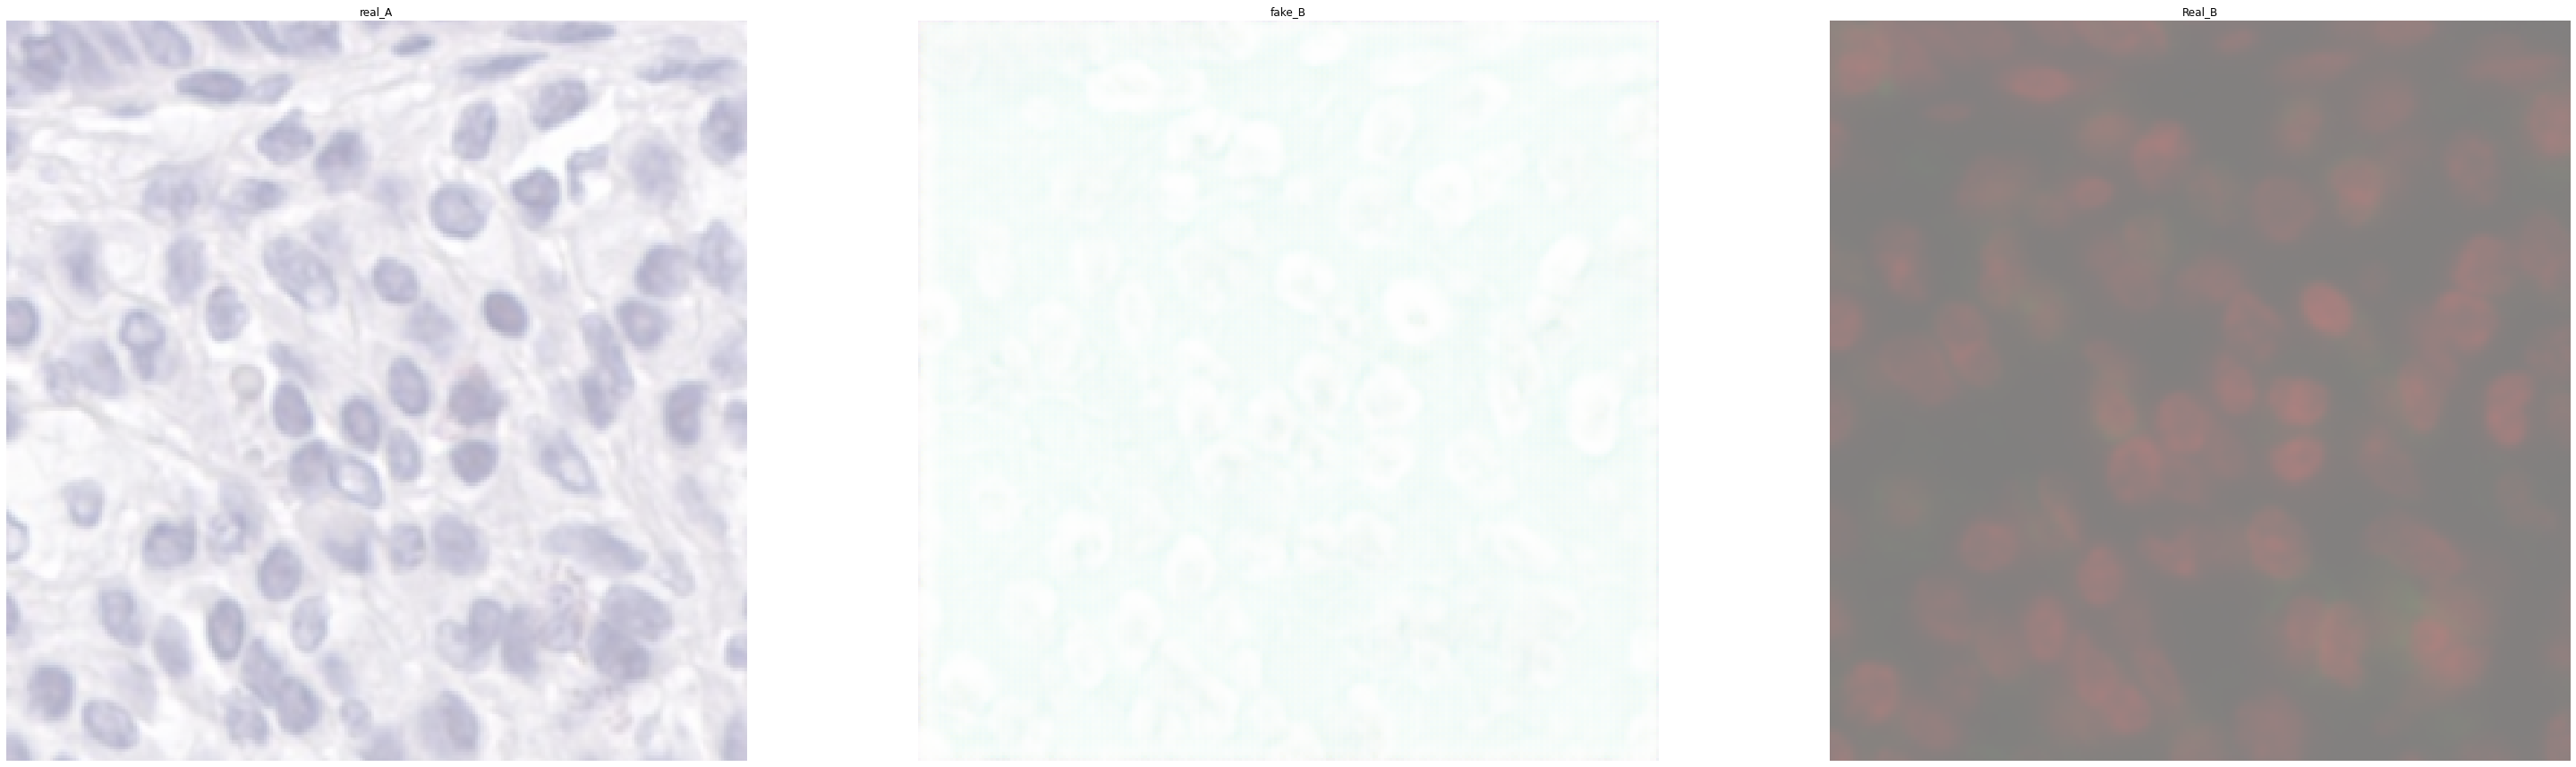

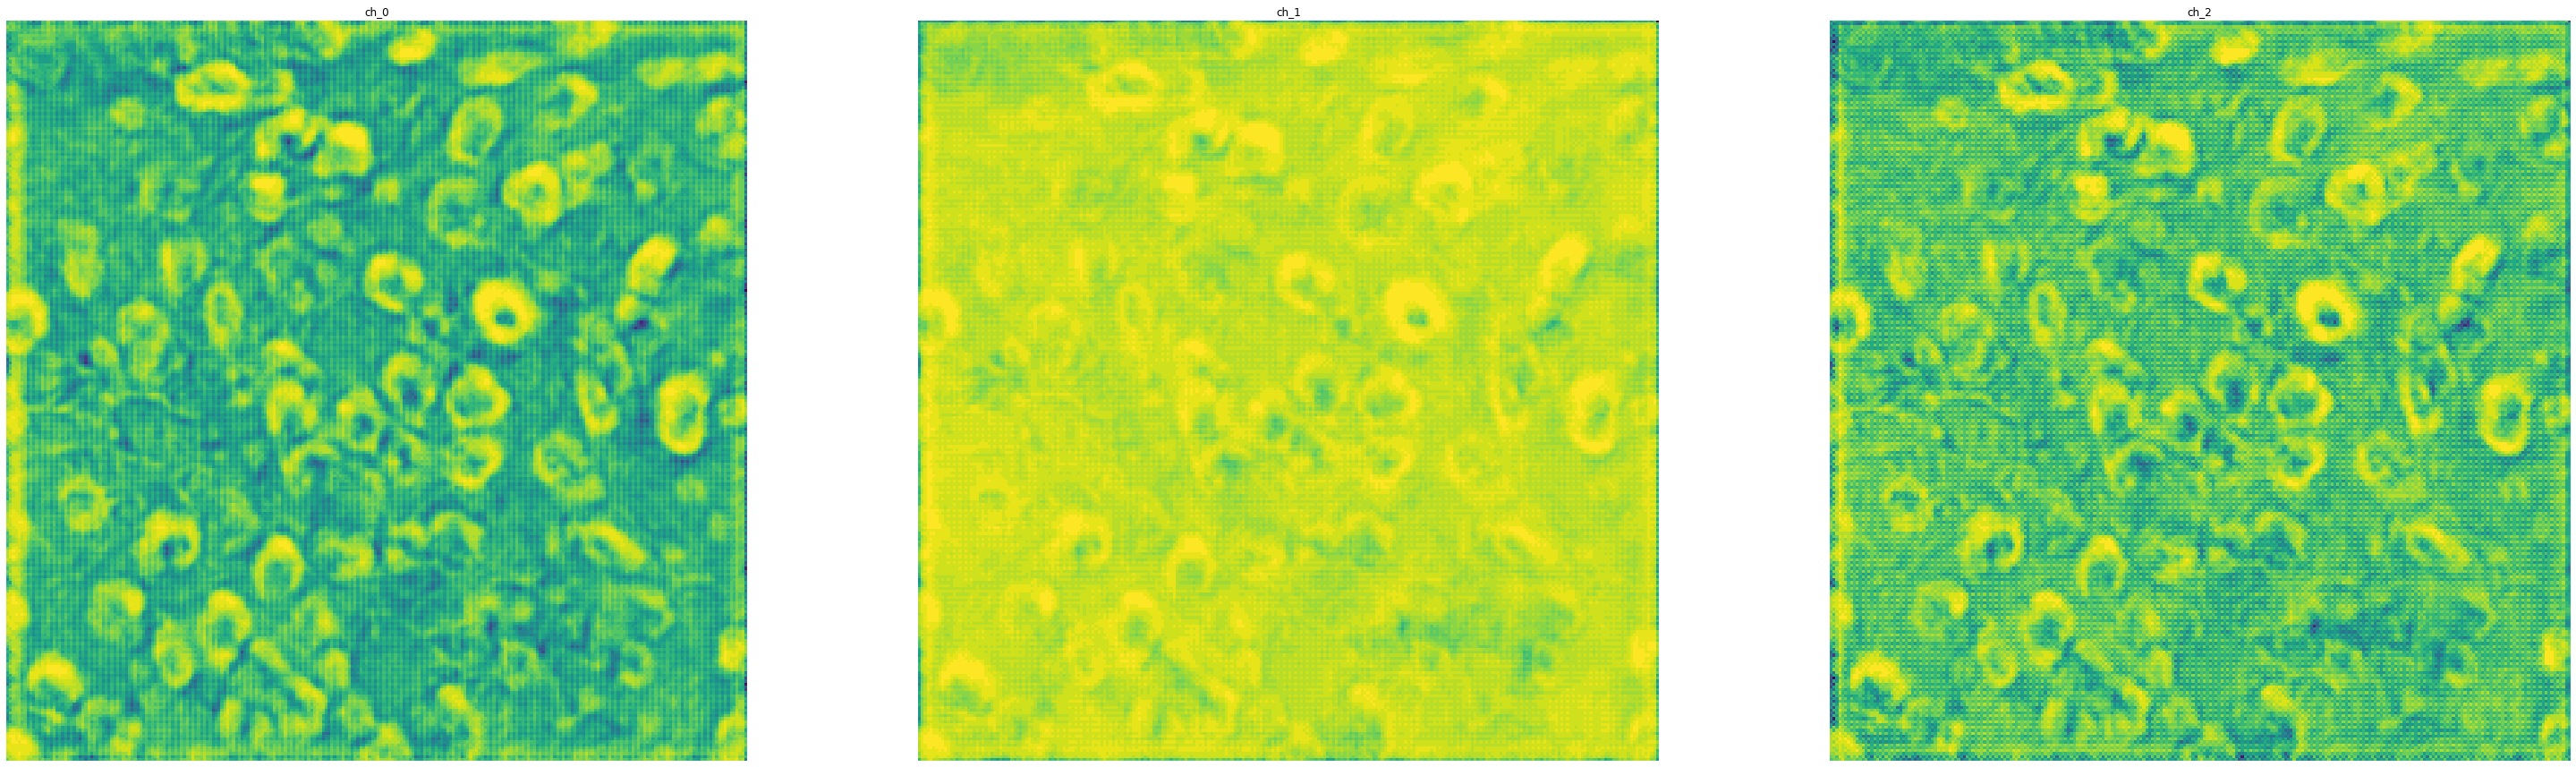

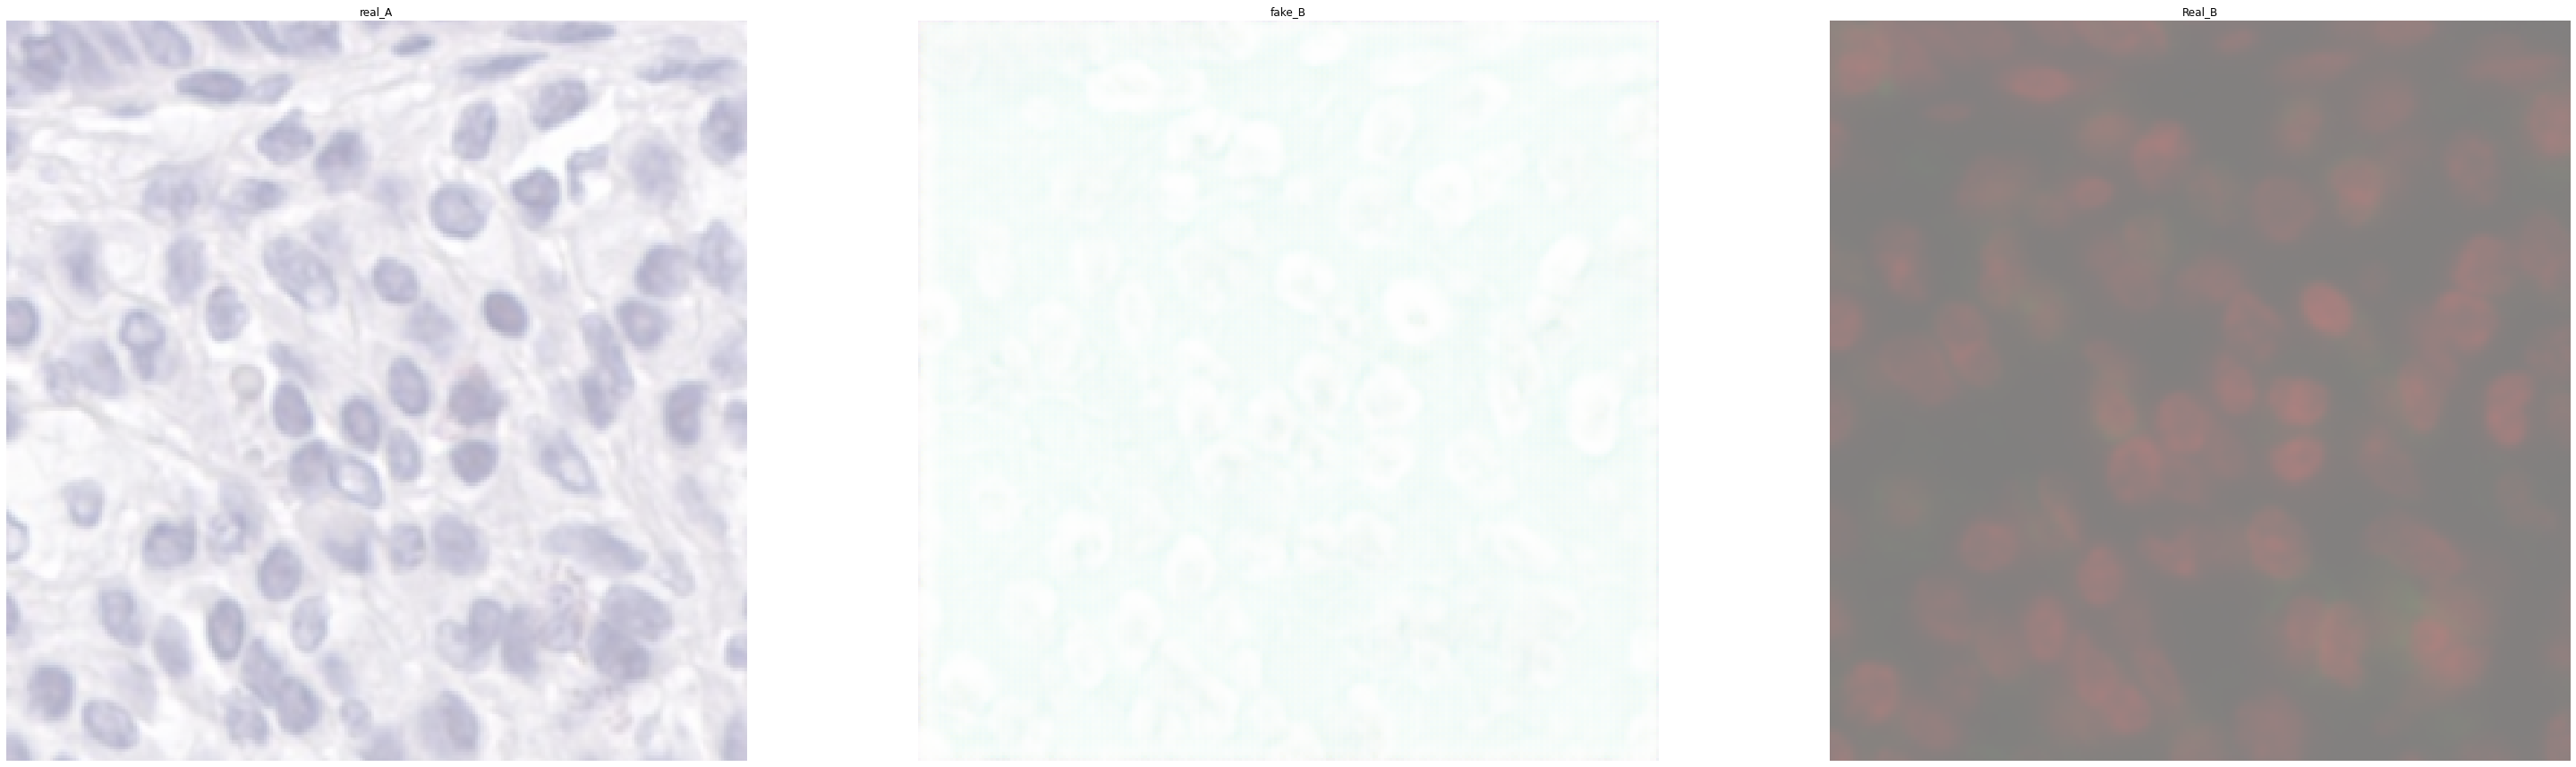

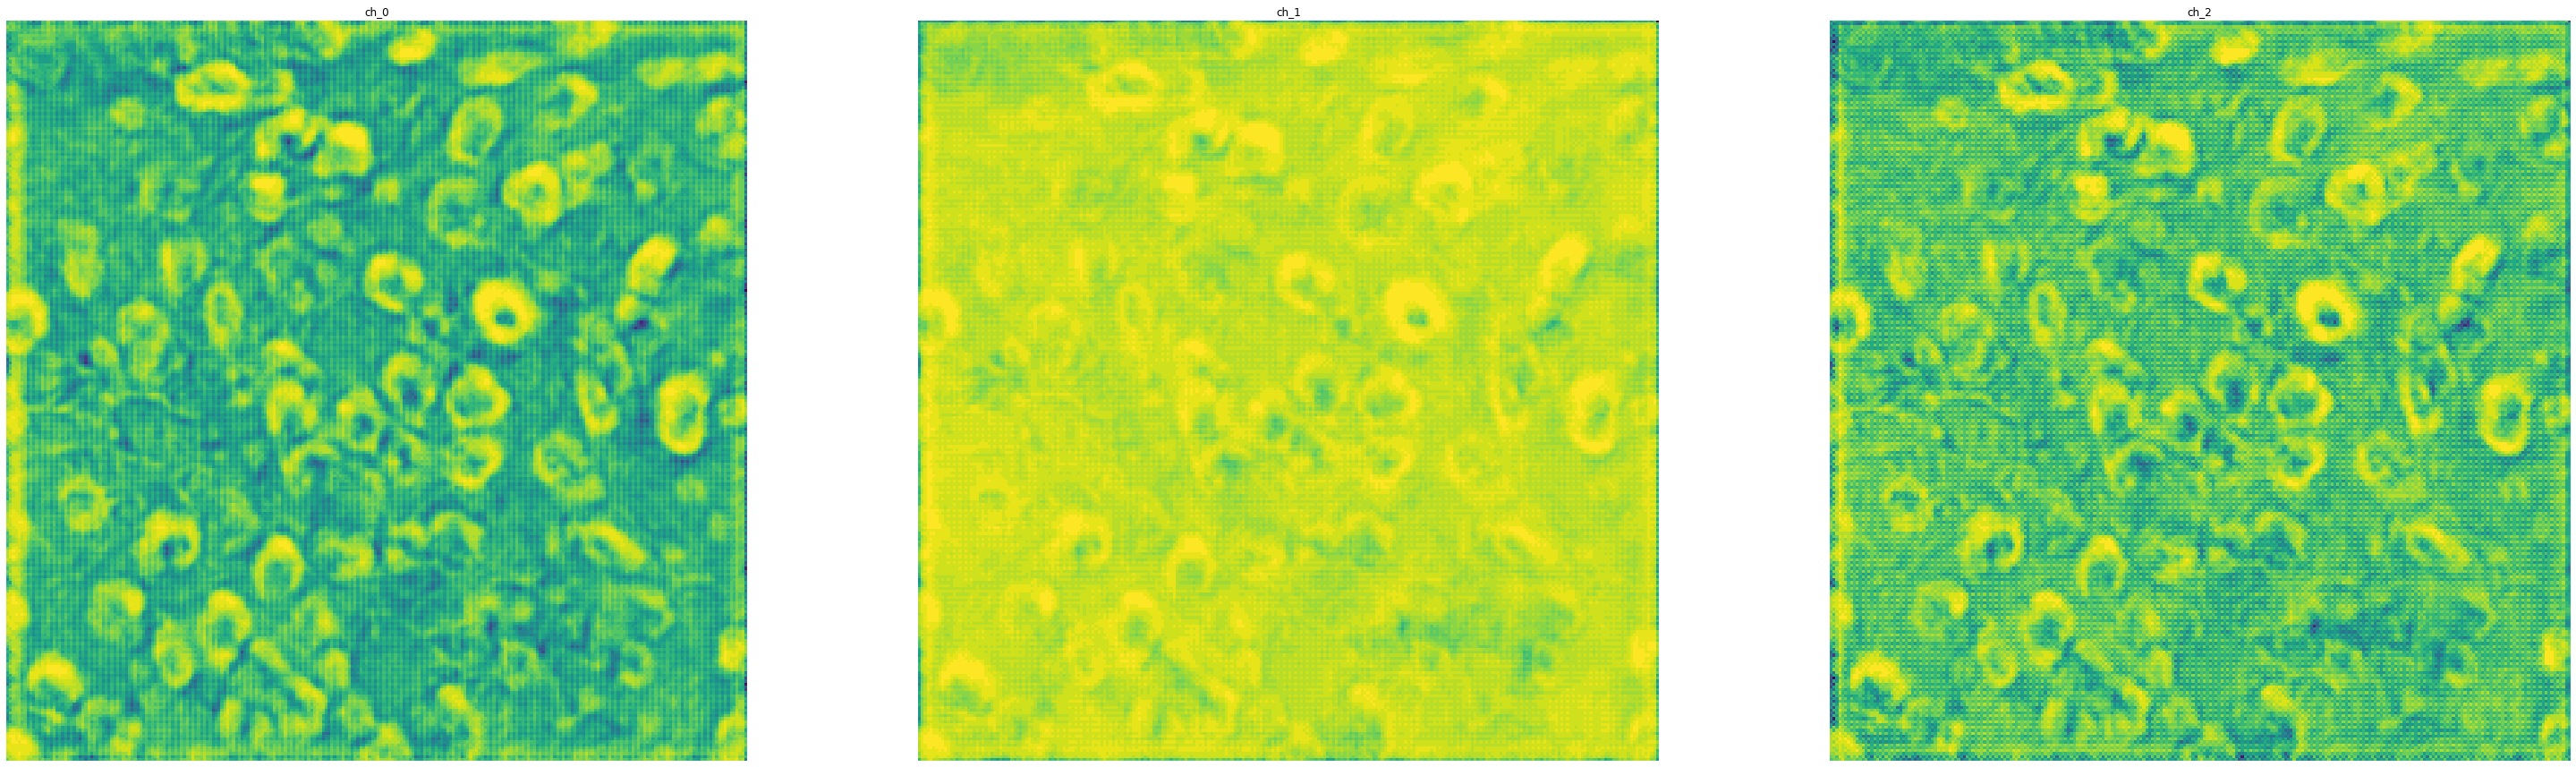

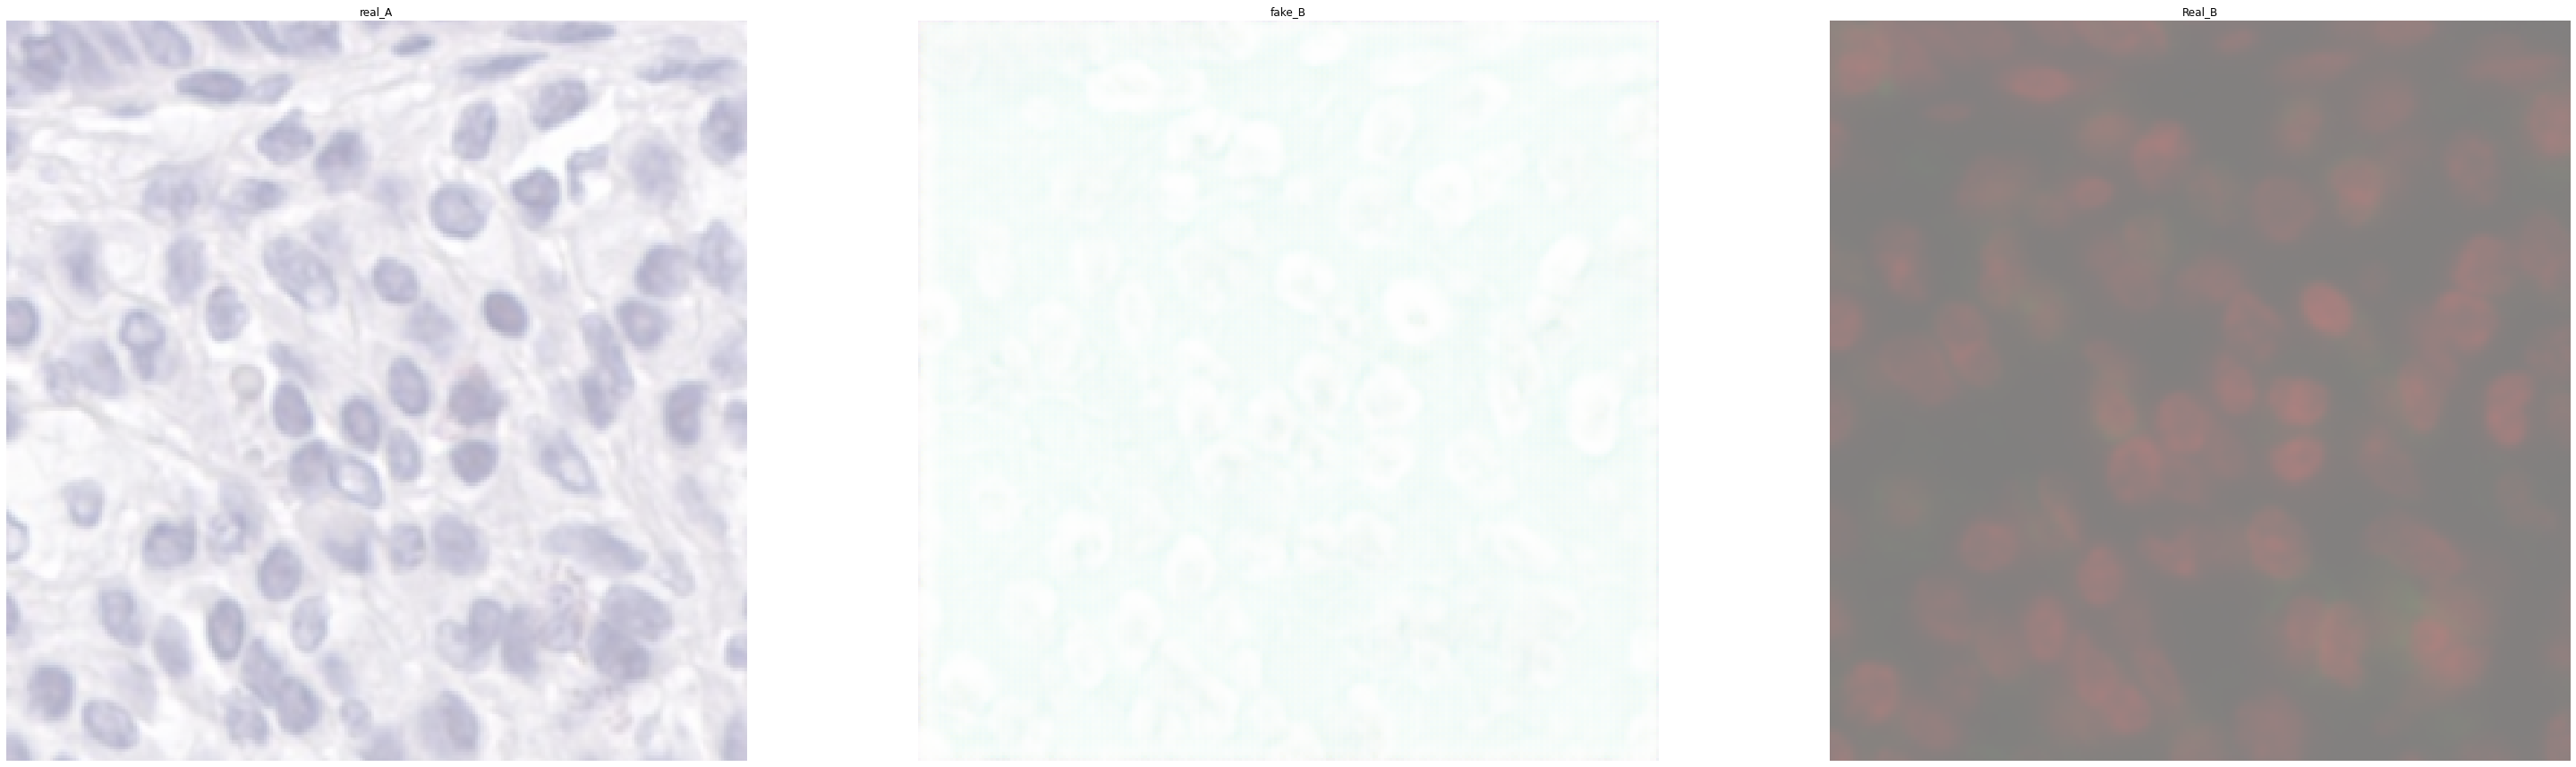

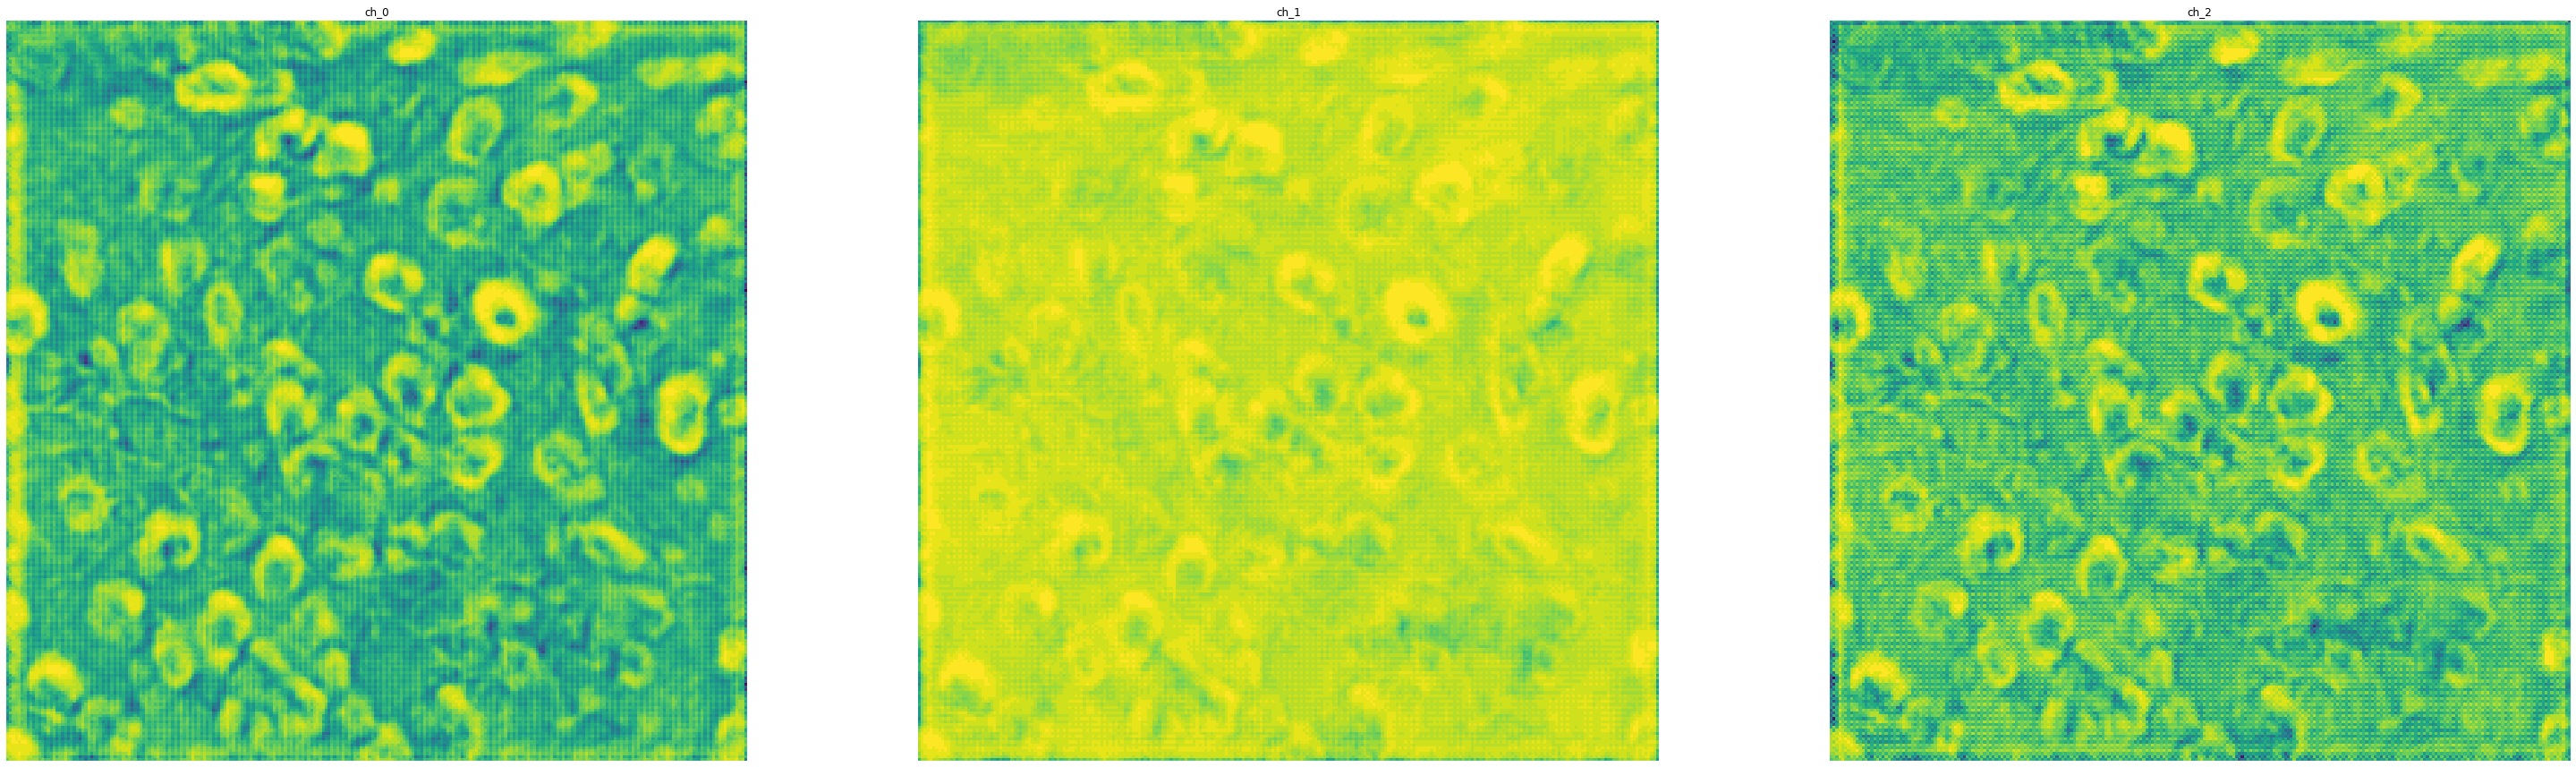

In [6]:
path_results = "/net/coxfs01/srv/export/coxfs01/pfister_lab2/share_root/Lab/scajas/pytorch-CycleGAN-and-pix2pix/tiff_v2/vcg_changing_deconv_by_upsam/test_latest/images"
def plot_results(path,thr):
    idx =0
    for el in os.listdir(path):
        if ".png" in el:
            key = el[:-10]#png
            print(key)
            #key = "_"+matcher+"_"
            #"""
            list_of_images = return_list_of_matches(key, os.listdir(path))
            print("Aligned images: ", list_of_images)
            Real_A = io.imread(os.path.join(path, list_of_images[0]))
            Fake_B = io.imread(os.path.join(path, list_of_images[1]))
            Real_B = io.imread(os.path.join(path, list_of_images[2]))
            plot_imgs([Real_A, Fake_B, Real_B], ["real_A", "fake_B", "Real_B"])
            #plot_imgs([Fake_B[:,:,0], Fake_B[:,:,3], Fake_B[:,:,17]], ["ch_0", "ch_3", "ch_17"])
            #"""
            idx+=1
            if idx ==thr:
                break
        if ".tiff" in el:
            key = el[:-11]#png
            print(key)
            list_of_images = return_list_of_matches(key, os.listdir(path))
            print("Aligned images: ", list_of_images)
            Real_A = io.imread(os.path.join(path, list_of_images[0]))
            Fake_B = io.imread(os.path.join(path, list_of_images[1]))
            Real_B = io.imread(os.path.join(path, list_of_images[2]))
            print(Real_A.shape, Fake_B.shape, Real_B.shape)
            plot_imgs([Real_A, Fake_B, Real_B], ["real_A", "fake_B", "Real_B"])
            
            plot_imgs([Fake_B[:,:,0], Fake_B[:,:,1], Fake_B[:,:,2]], ["ch_0", "ch_1", "ch_2"])
            #plot_imgs([Fake_B[:,:,0], Fake_B[:,:,3], Fake_B[:,:,17]], ["ch_0", "ch_3", "ch_17"])
            #"""
            idx+=1
            if idx ==thr:
                break
            
plot_results(path_results,3)